In [43]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [20]:
def norm(X):
    mean = X.mean(axis = 0)
    sigma = X.std(axis = 0)
    sigma[sigma==0] = 1
    X_norm = (X - mean) / sigma
    return X_norm

In [41]:
class K_means:
    def __init__(self, n_clusters = 3, random_state = 42, max_iter = 100):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.max_iter = max_iter
    def cal_dis(self, x1, x2):
        return np.linalg.norm(x1-x2) ** 2
    def fit(self, X):
        self.X = X
        self.N = self.X.shape[0]
        np.random.seed(self.random_state)
        self.cluster_center = X[np.random.choice(self.N, self.n_clusters)]
        self.clusters_belong = np.zeros(self.N, dtype = np.int32)
        self.clusters = [[] for _ in range(self.n_clusters)]
        for epoch in range(self.max_iter):
            upd = False
            # 重新分簇
            for i in range(self.N):
                dis_list = np.zeros(self.n_clusters)
                for j in range(self.n_clusters):
                    dis_list[j] = self.cal_dis(self.X[i], self.cluster_center[j])
                c_id = dis_list.argmin()
                if c_id != self.clusters_belong[i]:
                    upd = True
                self.clusters_belong[i] = c_id
            if not upd:
                break
            self.clusters = [[] for _ in range(self.n_clusters)]
            for i in range(self.N):
                self.clusters[self.clusters_belong[i]].append(self.X[i])
            # 选取新的类中心
            for i in range(self.n_clusters):
                self.cluster_center[i] = np.array(self.clusters[i]).mean()
        return self.clusters_belong

[2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 2 1 1 0 2 1 2 2 1 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 0 1 2 2 2 1 1 1 1 0 1 1 2 1 1 1 2 1 1 1 1 2 1 0 1 0 0 0 0 2 0 1 0 0
 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.7266666666666667


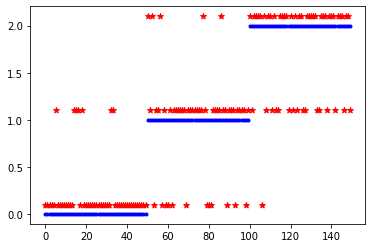

In [62]:
data = load_iris()
X, y = data.data, data.target
X = norm(X)
model = K_means(n_clusters = 3, random_state = 42, max_iter = 100)
bel = model.fit(X)
print(bel)
print(y)
bel[bel==2] = 3
bel[bel==0] = 2
bel[bel==3] = 0
plt.scatter(np.arange(y.shape[0]), y, c = 'blue', marker = '.')
plt.scatter(np.arange(y.shape[0]), bel + .1, c = 'red', marker = '*')
acc = (bel==y).sum() / bel.shape[0]
print(acc)